# Applying TFIDF Vectors and t-SNE to Subreddit Content
While researching for this project, I discovered a whole lot of subreddit mappings and visualaztions out there. Most of them employ user engagement as a metric for modularity detection. (Insert Sources). Since this project is based on breaking free of traditional user interest-patterns, I decided to quantify subreddit differences by content alone, in much the same way as Andrej Kaparthy does in [this blog post](http://karpathy.github.io/2014/07/02/visualizing-top-tweeps-with-t-sne-in-Javascript/).

## Collecting Data
Using the previously mentioned post as a rough guide, I started implementing the community difference analysis. Initial analysis, I simply downloaded comment text from a large handful of default subreddits, with the code saved in /download.py. Basically I just save a file for each sub with concatenated raw comment text, and a list of the files (for scikit to use later on).

In [73]:
import pickle
files_store = open('data/sub_files.pickle','rb')
files_list = pickle.load(files_store)
print(files_list)

['data/subs/gadgets.txt', 'data/subs/sports.txt', 'data/subs/gaming.txt', 'data/subs/pics.txt', 'data/subs/worldnews.txt', 'data/subs/videos.txt', 'data/subs/AskReddit.txt', 'data/subs/aww.txt', 'data/subs/funny.txt', 'data/subs/news.txt', 'data/subs/movies.txt', 'data/subs/blog.txt', 'data/subs/books.txt', 'data/subs/history.txt', 'data/subs/food.txt', 'data/subs/philosophy.txt', 'data/subs/Jokes.txt', 'data/subs/Art.txt', 'data/subs/DIY.txt', 'data/subs/space.txt', 'data/subs/Documentaries.txt', 'data/subs/askscience.txt', 'data/subs/nottheonion.txt', 'data/subs/todayilearned.txt', 'data/subs/personalfinance.txt', 'data/subs/gifs.txt', 'data/subs/listentothis.txt', 'data/subs/IAmA.txt', 'data/subs/announcements.txt', 'data/subs/TwoXChromosomes.txt', 'data/subs/creepy.txt', 'data/subs/nosleep.txt', 'data/subs/GetMotivated.txt', 'data/subs/WritingPrompts.txt', 'data/subs/LifeProTips.txt', 'data/subs/EarthPorn.txt', 'data/subs/explainlikeimfive.txt', 'data/subs/Showerthoughts.txt', 'dat

## Vectorization
Next I used the TfidfVectorizer from scikit to process and vectorize the content based on text features. These vectors are dimensioned according to the number of ngrams.

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(input='filename',stop_words='english',lowercase=True, strip_accents='unicode', smooth_idf=True,sublinear_tf=False, use_idf=True, ngram_range=(1,2),min_df=2)
vecs = vectorizer.fit_transform(files_list)

This gives a 47 X 35155 matrix where each row is a subreddit TFIDF matrix with horizontal dimension corresponding to the ngram features.

In [75]:
vecs

<47x34331 sparse matrix of type '<class 'numpy.float64'>'
	with 169299 stored elements in Compressed Sparse Row format>

## Dimensionality Reduction
The next step is to apply t-SNE implementations and see how they work on the data. I used scikit's built-implementation for this task. For t-SNE the the dot product dissimilarities are require as input.

In [76]:
dists = (vecs * vecs.T).todense()

In [77]:
from sklearn.manifold import TSNE
vecs_2d = TSNE(n_components=2).fit_transform(dists)
vecs_2d

array([[ -19.21729   ,  -52.076824  ],
       [  40.63556   ,   27.472914  ],
       [  15.5593405 ,   11.393721  ],
       [ -44.955204  ,   31.089176  ],
       [ -32.694374  ,   47.229584  ],
       [   9.929646  ,   -5.642042  ],
       [ -48.55401   ,   12.780461  ],
       [  38.767998  ,    9.299987  ],
       [  21.08333   ,   41.81773   ],
       [ -10.294265  ,   60.64102   ],
       [  24.400717  ,   25.274132  ],
       [ -10.712632  ,  -32.398396  ],
       [  23.924156  ,  -18.58122   ],
       [ -44.68824   ,  -21.81585   ],
       [  58.731525  ,  -31.701887  ],
       [ -53.415462  ,   -4.241006  ],
       [  56.620445  ,   17.6246    ],
       [  -5.643079  ,  -70.59362   ],
       [ -33.306145  ,  -66.95908   ],
       [  36.789783  ,  -72.7711    ],
       [   4.80266   ,   49.62712   ],
       [  27.005299  ,  -83.25423   ],
       [  -3.4937096 ,   34.49158   ],
       [   7.986268  ,   25.014845  ],
       [ -10.899527  ,   20.719341  ],
       [  27.956715  ,   

Now we have (hopefully meaningful) 2-dimensional vector representations of all the subreddits!

## Visualizations
To get a rough idea of that the reduced vectors look like, I produced a simple plot. Note that each execution of t-SNE results in different embeddings, but the dissimilarities are preserved. Subreddit pairs like r/worldnews and r/news are always close, which is promising. Also note that the colours used for plotting have no meaning.

<IPython.core.display.Javascript object>


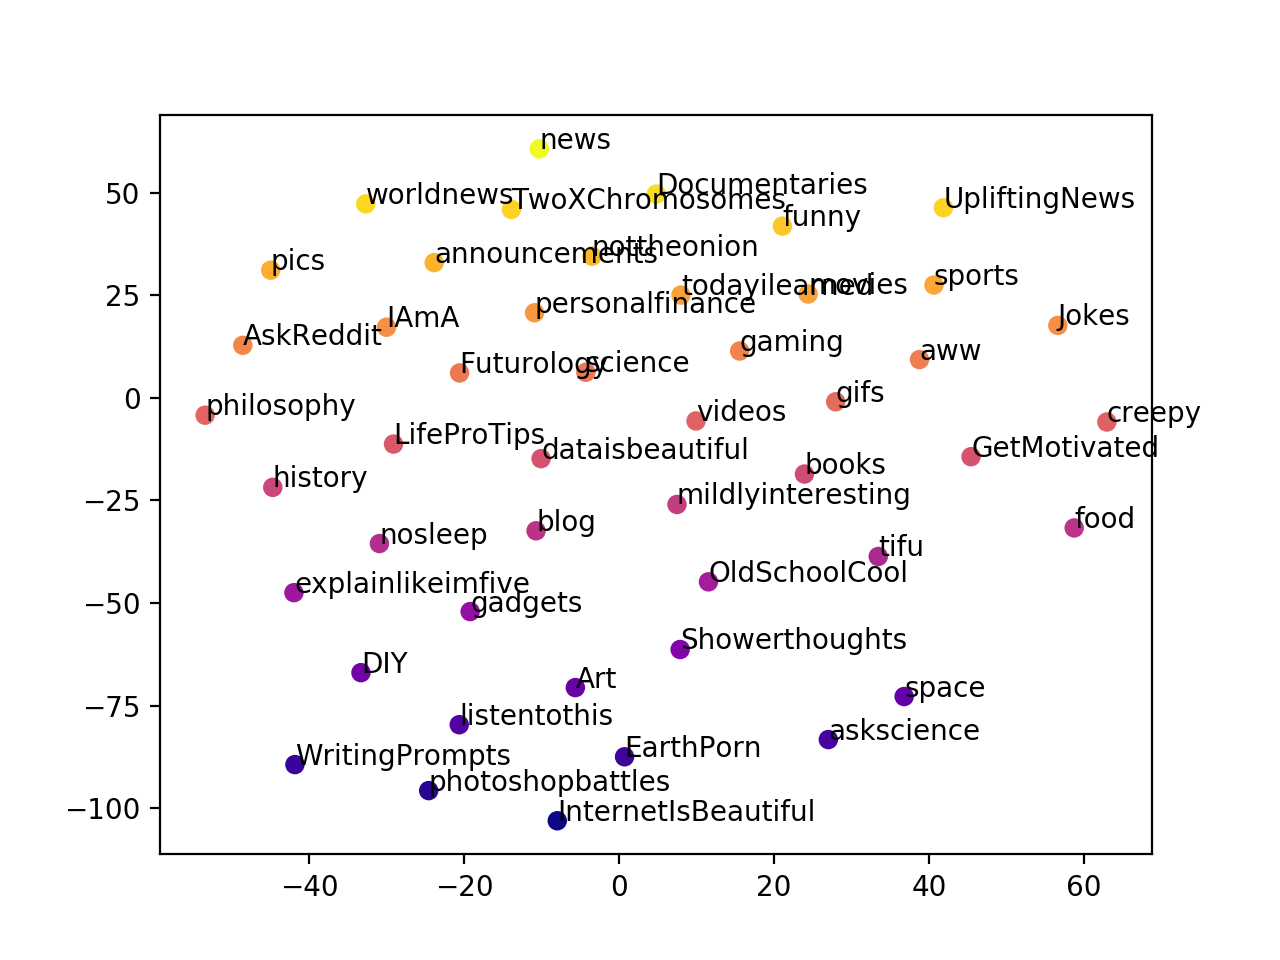

In [100]:
%matplotlib notebook
import matplotlib.pyplot as plt
x = vecs_2d[:,0]
y = vecs_2d[:,1]
plt.scatter(x,y,c=y,cmap='plasma')

# annotate the plot
names_store = open('data/sub_names.pickle','rb')
names = pickle.load(names_store)
for i, name in enumerate(names):
    plt.annotate(name,(x[i],y[i]))
    
plt.show()

My next steps will be to download a larger dataset and apply clustering/modularity analysis to visualize in more depth.

## A Slightly Larger Dataset
To get a larger set of subreddits, I downloaded a csv file containing info for all public subreddits (as of the posting of [this reddit post](https://www.reddit.com/r/datasets/comments/8isnek/list_of_every_subreddit_on_reddit/). I downloaded info for 100 of them and performed the same analysis procedure as before. (See /download_large.py)

<IPython.core.display.Javascript object>


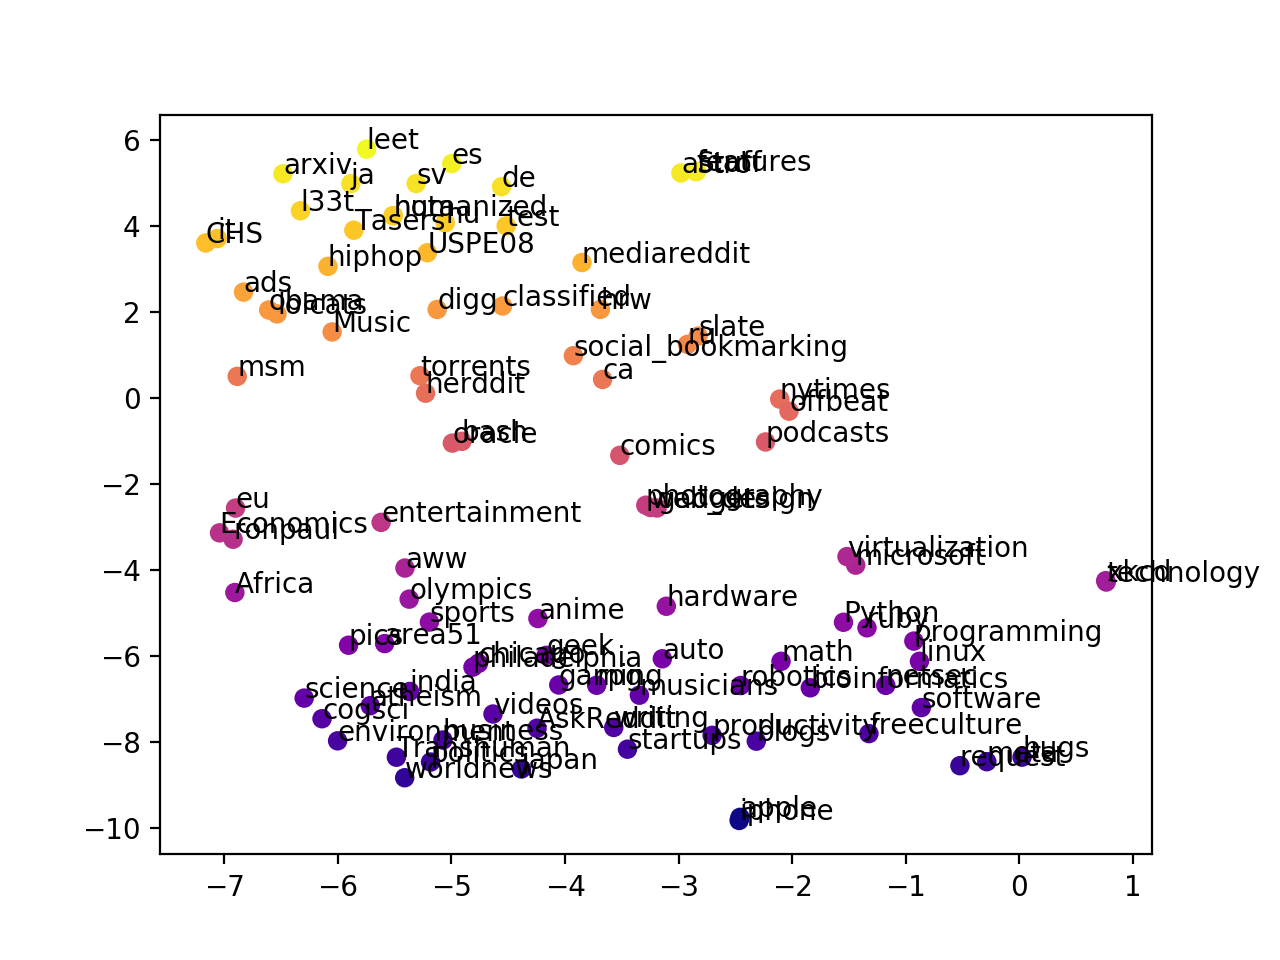

In [109]:
files_store = open('data/sub_files_large.pickle','rb')
files_list = pickle.load(files_store)
vectorizer = TfidfVectorizer(input='filename',stop_words='english',lowercase=True, strip_accents='unicode', smooth_idf=True,sublinear_tf=False, use_idf=True, ngram_range=(1,2),min_df=2)
vecs = vectorizer.fit_transform(files_list)
dists = (vecs * vecs.T).todense()
vecs_2d = TSNE(n_components=2).fit_transform(dists)

plt.figure()
x = vecs_2d[:,0]
y = vecs_2d[:,1]
plt.scatter(x,y,c=y,cmap='plasma')
names_store = open('data/sub_names_large.pickle','rb')
names = pickle.load(names_store)
for i, name in enumerate(names):
    plt.annotate(name,(x[i],y[i]))
plt.show()

The annotations in this plot are a little jumbled, but it's possible to see the power of the algorithm working in the lower right-hand corner, with subreddits like programming, linux, and ruby closely surrounding r/software. The figure also shows some interesting interesting features (deviations from the pattern that one mught expect) which could shed light on discrepencies between subreddit names and the actual content of discussion happening in the comments.